In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn import cluster
# from sklearn import metrics
# from scipy import stats
# from sklearn.metrics import silhouette_score
# from sklearn import decomposition
from scipy.cluster import hierarchy
# from scipy import stats
# from random import sample 
# import math
import os
# from sklearn import decomposition
# import glob
# from sklearn import linear_model
from scipy.stats import zscore

In [31]:
# Inputs:
exp_num = 1
results_dir = "/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/Code/exon_analysis/Results/IL33"
data_dir = "/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/Code/exon_analysis/Data"
if exp_num == 1:
    exp_file = "20241120_deseq2_normalized_RNAseq_counts_exp1_removedSamples.csv"
else:
    exp_file = "20241120_deseq2_normalized_RNAseq_counts_exp2_removedSamples.csv"
os.chdir(results_dir)

In [32]:
# load data
data = pd.read_csv(f"{results_dir}/{exp_file}")
# Set the row names to be the gene column
print(data.shape)
data = data.set_index("Unnamed: 0")
print(data.shape)

# load exons
exons = np.loadtxt(f"{data_dir}/exons_to_plot.txt", dtype=str)
print(len(exons))

# load exon naming
exon_map = pd.read_csv(f"{data_dir}/gata2_exon_names.csv")

(427386, 17)
(427386, 16)
12


In [33]:
# make sure exons are in current data
print(len(exons))
exons_subset = [exon for exon in exons if exon in data.index]

print(len(exons_subset))

12
12


In [34]:
# make data coef specifc
exon_data = data.loc[exons_subset]
exon_data

,Unstim_GATA2_0_Exp1_Rep3,IL33_GATA2_24_Exp1_Rep1,IL33_WT_24_Exp1_Rep1,IL33_WT_24_Exp1_Rep2,IL33_GATA2_24_Exp1_Rep2,IL33_GATA2_24_Exp1_Rep3,IL33_GATA2_24_Exp1_Rep4,IL33_GATA2_24_Exp1_Rep5,IL33_GATA2_24_Exp1_Rep6,Unstim_WT_0_Exp1_Rep1,Unstim_WT_0_Exp1_Rep2,Unstim_WT_0_Exp1_Rep3,Unstim_WT_0_Exp1_Rep4,Unstim_WT_0_Exp1_Rep5,Unstim_GATA2_0_Exp1_Rep1,Unstim_GATA2_0_Exp1_Rep2
Unnamed: 0,,,,,,,,,,,,,,,,
NM_001355253.1,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323
NM_001355253.2,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,1.333450,0.965093,0.871086,1.231323
NM_001355253.3,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323
NM_001355253.4,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323
NM_001355253.5,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323
NM_001355253.6,1.160091,0.933881,1.885399,0.97767,0.921526,1.194998,1.708435,3.519580,0.986285,0.86057,0.850386,1.822223,0.815594,0.965093,0.871086,1.231323
NM_008090.1,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323
NM_008090.2,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,1.333450,0.965093,0.871086,1.231323
NM_008090.3,1.160091,0.933881,0.924620,0.97767,0.921526,1.194998,1.093580,1.319313,0.986285,0.86057,0.850386,0.883949,0.815594,0.965093,0.871086,1.231323


In [35]:
# Sort columns alphanumerically
sorted_columns = sorted(exon_data.columns)
print(sorted_columns)

['IL33_GATA2_24_Exp1_Rep1', 'IL33_GATA2_24_Exp1_Rep2', 'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6', 'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5']


In [36]:
# sorted cols
if exp_num==1:
    sorted_columns = [
    'Unstim_WT_0_Exp1_Rep1', 'Unstim_WT_0_Exp1_Rep2', 'Unstim_WT_0_Exp1_Rep3', 'Unstim_WT_0_Exp1_Rep4', 'Unstim_WT_0_Exp1_Rep5',
    'Unstim_GATA2_0_Exp1_Rep1', 'Unstim_GATA2_0_Exp1_Rep2', 'Unstim_GATA2_0_Exp1_Rep3',
    'IL33_WT_24_Exp1_Rep1', 'IL33_WT_24_Exp1_Rep2',
    'IL33_GATA2_24_Exp1_Rep1', 'IL33_GATA2_24_Exp1_Rep2', 'IL33_GATA2_24_Exp1_Rep3', 'IL33_GATA2_24_Exp1_Rep4', 'IL33_GATA2_24_Exp1_Rep5', 'IL33_GATA2_24_Exp1_Rep6']
else:
    sorted_columns = ['Unstim_WT_0_Exp2_Rep1', 'Unstim_WT_0_Exp2_Rep2', 'Unstim_WT_0_Exp2_Rep3', 'Unstim_WT_0_Exp2_Rep4', 'Unstim_WT_0_Exp2_Rep5',
                    'Unstim_GATA2_0_Exp2_Rep1', 'Unstim_GATA2_0_Exp2_Rep2', 'Unstim_GATA2_0_Exp2_Rep3',
                    'Staph_WT_24_Exp2_Rep1', 'Staph_WT_24_Exp2_Rep2', 'Staph_WT_24_Exp2_Rep3', 'Staph_WT_24_Exp2_Rep4', 'Staph_WT_24_Exp2_Rep5', 'Staph_WT_24_Exp2_Rep6',
                    'Staph_GATA2_24_Exp2_Rep1', 'Staph_GATA2_24_Exp2_Rep3']
                  



In [37]:
# rename exons to identifiable names
exon_data = exon_data.reset_index()
exon_data = exon_data.rename(columns={'Unnamed: 0': 'exon_feature'})

exon_data = pd.merge(exon_data, exon_map, how="left", on="exon_feature")


In [38]:
# Drop the exon_feature column
exon_data = exon_data.drop(columns=['exon_feature'])

# Set exon_name as the index
exon_data = exon_data.set_index('exon_name')

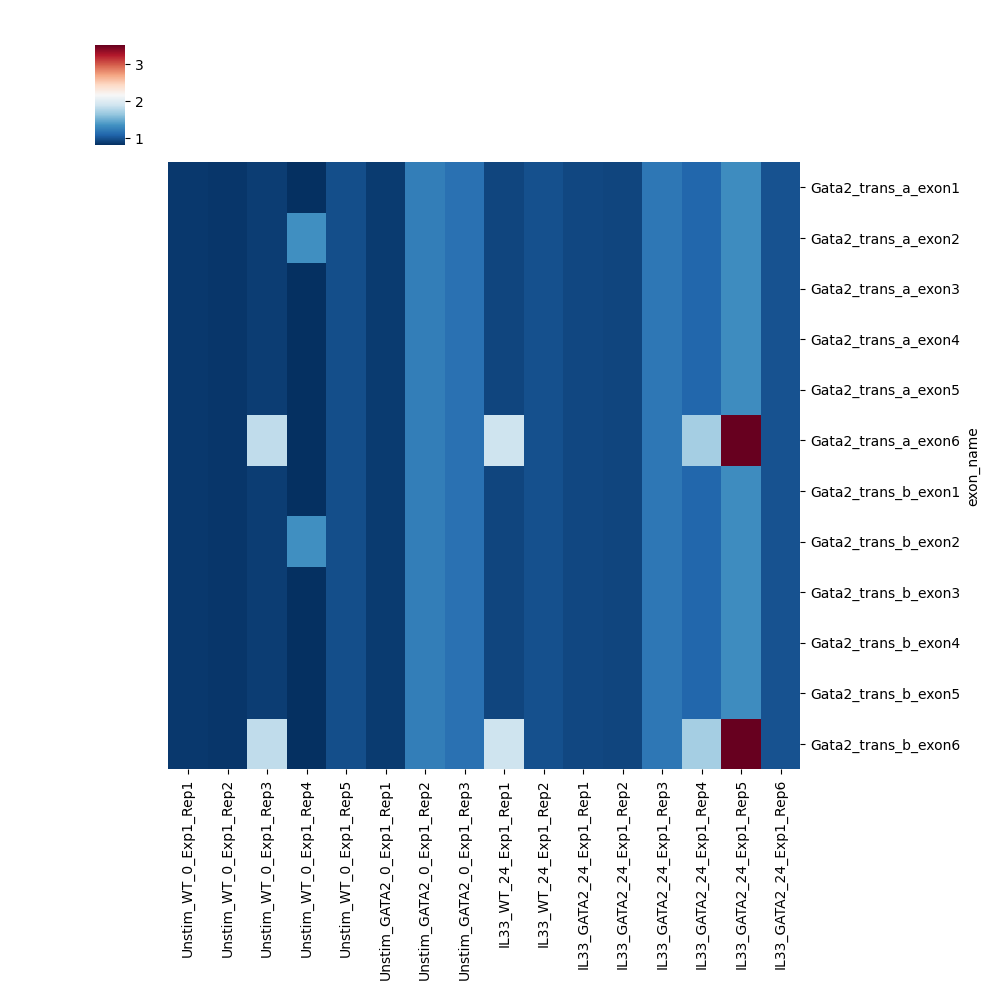

In [39]:
# heatmap - no clustering
# c = sns.color_palette("RdBu", 7)
# c_rev = c.reverse()
# c = sns.color_palette("RdBu_r", as_cmap=True)
# cluster_heatmap = sns.clustermap(avg_data, metric='correlation',method='complete', cmap=c,z_score=0, 
#                                  col_cluster=False,vmin=-2.5, vmax=2.5, yticklabels=False, figsize=(12, 6))
# plt.savefig('avg_deg_heatmap.pdf',format='pdf')
# plt.show()

# heatmap no average
c = sns.color_palette("RdBu_r", as_cmap=True)
cluster_heatmap = sns.clustermap(exon_data.loc[:, sorted_columns], metric='correlation',method='complete', cmap=c,z_score=None, 
                                 row_cluster=False, col_cluster=False)
cluster_heatmap.cax.set_position([0.1, 0.85, 0.03, 0.1])
plt.savefig('gata2_exon_heatmap_deseq2_normalized.pdf',format='pdf')
plt.show()
